### Table of Contents
- [Introduction](#introduction)
- [1. Loading dataset and libraries](#loading)
- [2. Preprocessing](#preprocessing)
    - [2.1 Rename columns](#rename-columns)
    - [2.2 Data types](#data-types)
    - [2.2 Missing values](#missing-values)
    - [2.3 Duplicated data](#duplicated-data)
- [3. Statistical description](#statistical)
    - [3.1 Description](#description)
    - [3.2 Scatter Plots, Clustering and Data Exploration](#exploration)
    - [3.3 Correlation Heatmap](#correlation)
- [4. Models](#models)
    - [4.1 Standardization and splitting](#standardization)
    - [4.2 Model Zero](#model-0)
    - [4.3 Grid Search](#grid)

## Introduction <a name="introduction" />
### Danijel Sokolovic
### Indeks: 1392

### Energy efficiency
### Features
1. **X1 - A - Relative Compactness**\
This value is obtained by the sum of all surfaces of its envelope, divided by its gross heated volume.\
The Rc of a shape is derived in that its volume to surface ratio is compared to that of the most compact shape with the same volume.    
2. X2 - B - Surface Area
3. X3 - C - Wall Area
4. X4 - D - Roof Area
5. X5 - E - Overall Height
6. X6 - F - Orientation
7. X7 - G - Glazing Area
8. X8 - H - Glazing Area Distribution

### Output (target values)
- y1 Heating Load
- y2 Cooling Load

## 1. Loading dataset and libraries <a name="loading" />

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv("en_eff.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.shape

(768, 10)

Vidimo da imamo 768 rows i 10 columns, features, sto se uklapa sa opisom dataseta.

## 2. Preprocessing <a name="preprocessing"/>

### 2.1 Rename columns  <a name="rename-columns"/>

In [5]:
df.columns = ['relative_compactness', 
              'surface_area', 
              'wall_area', 
              'roof_area', 
              'overall_height', 
              'orientation', 
              'glazing_area', 
              'glazing_distribution', 
              'heating_load', 
              'cooling_load']
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 2.2 Data types  <a name="data-types"/>

In [6]:
df.dtypes

relative_compactness    float64
surface_area            float64
wall_area               float64
roof_area               float64
overall_height          float64
orientation               int64
glazing_area            float64
glazing_distribution      int64
heating_load            float64
cooling_load            float64
dtype: object

Potvrdjujemo da se radi samo sa brojevima, realni i celi brojevi.

### 2.3 Missing values  <a name="missing-values"/>

In [7]:
df.isnull().any()

relative_compactness    False
surface_area            False
wall_area               False
roof_area               False
overall_height          False
orientation             False
glazing_area            False
glazing_distribution    False
heating_load            False
cooling_load            False
dtype: bool

Proveravamo da li ima nekih NaN vrednosti. Zakljucak je da nema takvih vrednosti.

### 2.3 Duplicated data  <a name="duplicated-data"/>

In [8]:
duplicates = df.duplicated().sum()
duplicates

0

Proveravamo da li ima nekih duplih vrednosti, misli se na duplirane redove. Zakljucak je da nema dupliranih redova u datasetu.

## 3. Statistical Description  <a name="statistical"/>

### 3.1 Description <a name="description"/>

In [9]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Moze se primetiti da **max** vrednost za **heating_load** i **cooling_load** ne prelazi **50**. Takodje, **orientation** je izmedju vrednosti **2** i **5** (inkluzivno).\
**glazing_area**, **glazing_distribution**, **relative_compactness**, **overal_height** i **orientation** imaju veoma male vrednosti u odnosu na ostale.

### 3.2 Scatter Plots, Clustering and Data Exploration  <a name="exploration"/>

Uzimamo oba output-a, heating_load i cooling_load, u zavisnosti od prvog featur-a, relative_compactness.

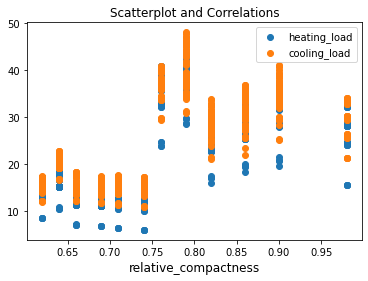

In [10]:
plt.scatter(df.relative_compactness, df.heating_load, label='heating_load')
plt.scatter(df.relative_compactness, df.cooling_load, label='cooling_load')

plt.title('Scatterplot and Correlations')
plt.xlabel('relative_compactness', fontsize=12)
plt.legend()
plt.show()

Ovde je predstavljena zavisnost heating_load i cooling_load od relative_compactness. Mozemo primetiti da postoje jasne grupacije, clusteri podataka. U primeru koji koristimo moze se primetiti da postoji 12 grupa u koje se moze podeliti relative_compactness.

Pod pretpostavkom da i ostale kolone sadrze odredjene "klase" u sebi, mozemo izvuci sve unique vrednosti iz svih kolona kao brzi test.

#### Number of uniques per column:

In [11]:
for c in df.columns:
    print("Number of unique values in {}: {}".format(c, len(df[c].unique())))

Number of unique values in relative_compactness: 12
Number of unique values in surface_area: 12
Number of unique values in wall_area: 7
Number of unique values in roof_area: 4
Number of unique values in overall_height: 2
Number of unique values in orientation: 4
Number of unique values in glazing_area: 4
Number of unique values in glazing_distribution: 6
Number of unique values in heating_load: 586
Number of unique values in cooling_load: 636


#### Unique values per column: 

In [12]:
for c in df.columns:
    print("Unique values in {}: {}".format(c, df[c].unique()))

Unique values in relative_compactness: [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
Unique values in surface_area: [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
Unique values in wall_area: [294.  318.5 343.  416.5 245.  269.5 367.5]
Unique values in roof_area: [110.25 122.5  147.   220.5 ]
Unique values in overall_height: [7.  3.5]
Unique values in orientation: [2 3 4 5]
Unique values in glazing_area: [0.   0.1  0.25 0.4 ]
Unique values in glazing_distribution: [0 1 2 3 4 5]
Unique values in heating_load: [15.55 20.84 21.46 20.71 19.68 19.5  19.95 19.34 18.31 17.05 17.41 16.95
 15.98 28.52 29.9  29.63 28.75 24.77 23.93  6.07  6.05  6.01  6.04  6.37
  6.4   6.85  6.79  6.77  6.81  7.18  7.1  10.85 10.54 10.77 10.56  8.6
  8.49  8.45  8.5  24.58 24.63 24.59 29.03 29.87 29.14 28.09 26.28 26.91
 26.37 25.27 23.53 24.03 23.54 22.58 35.56 37.12 36.9  35.94 32.96 32.12
 32.94 32.21 10.36 10.43 10.39 10.71 10.8  10.7  10.75 11.11 11.13 11.09
 11.16 

Ovaj rezultat potvrdjuje pretpostavku da sve kolone, sem naravno output kolona heating_load i cooling_load, imaju u sebi odredjene klastere ili "klase". Drugim recima, svi nasi ulazni parametri imaju svoje podele/klase unutar sebe. Tako npr. vidimo da relative_compactness ima 12 razlicitih vrednosti, orientation 4 itd. Posto znamo da je ukupan broj redova 768, vidimo da cak i heating/cooling load imaju neke duplikate, odnosno da se neke vrednosti ponavljaju, jer nema 768 uniques.

Posto smo ovo videli, sada mozemo vizuelno da proverimo svaku od njih, redom od prvog do poslednjeg feature.\
Za ovo cemo iskoristiti seaborn i hue parametar. Po x i y osama ce uvek biti output vrednosti, cooling_load i heating_load, respektivno, dok ce se raspodela i potencijalna zavisnost i grupacije videti kroz hue vrednost.

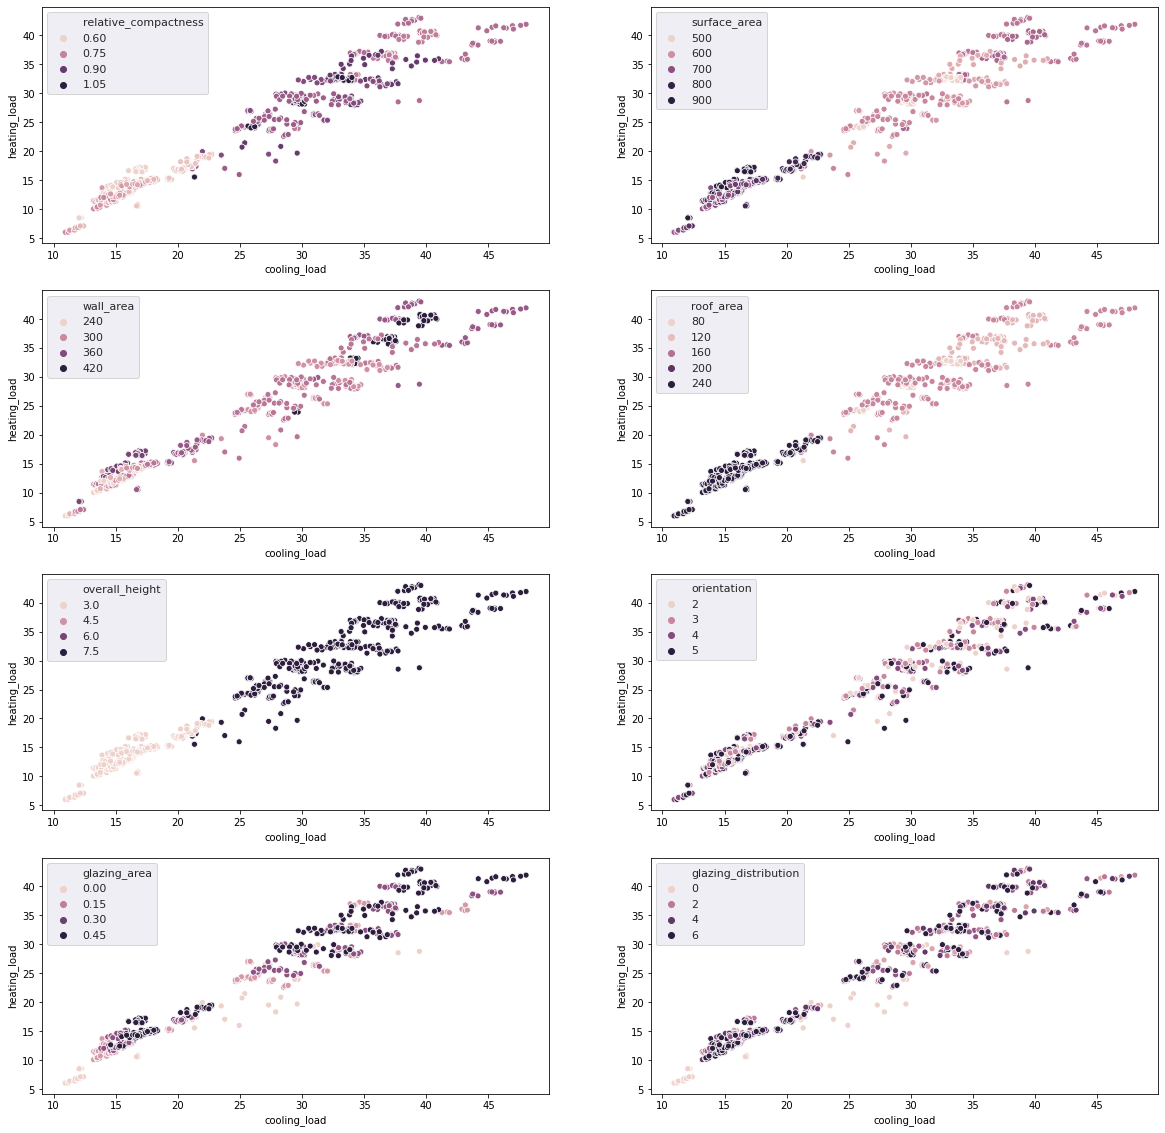

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

sns.set(style='darkgrid')
sns.scatterplot(ax=ax[0][0], x=df.cooling_load, y=df.heating_load, hue=df.relative_compactness, data=df)
sns.scatterplot(ax=ax[0][1], x=df.cooling_load, y=df.heating_load, hue=df.surface_area, data=df)
sns.scatterplot(ax=ax[1][0], x=df.cooling_load, y=df.heating_load, hue=df.wall_area, data=df)
sns.scatterplot(ax=ax[1][1], x=df.cooling_load, y=df.heating_load, hue=df.roof_area, data=df)
sns.scatterplot(ax=ax[2][0], x=df.cooling_load, y=df.heating_load, hue=df.overall_height, data=df)
sns.scatterplot(ax=ax[2][1], x=df.cooling_load, y=df.heating_load, hue=df.orientation, data=df)
sns.scatterplot(ax=ax[3][0], x=df.cooling_load, y=df.heating_load, hue=df.glazing_area, data=df)
sns.scatterplot(ax=ax[3][1], x=df.cooling_load, y=df.heating_load, hue=df.glazing_distribution, data=df)

plt.show()

Na osnovu ovog eksperimenta mozemo primetiti da postoje odredjene grupacije ili klasteri. To su one slike gde se najjasnije moze razlikovati neka grupa tacaka, na osnovu hue vrednosti, boje. To su grafici sa sledecim atributima hue vrednosti:
1. **relative_compactness** (u donjem levom uglu se izdvaja grupa, koja oznacava da manje vrednosti relative_compactness-a proizvode manje vrednosti cooling i heating load)
2. **surface_area** (u donjem levom uglu se izdvaja grupa, koja oznacava da vece vrednosti surface_area proizvode manje vrednosti cooling i heating load)
3. **roof_area** (u donjem levom uglu se izdvaja grupa, koja oznacava da vece vrednosti roof_area proizvode manje vrednosti cooling i heating load)
4. **overall_height** (na osnovu prethodnih eksperimenata, utvrdili smo da postoje samo 2 visine koje se pominju u datasetu. Ovde se zbog toga mozda i najjasnije vide grupe. Takodje, kao i kod prethodnih, u donjem levom uglu se jasno izdvaja grupa koja ukazuje na to da za manje vrednosti overall_height imamo manje vrednosti output-a)

Sve gore pomenute 4 slike imaju istu osobinu. Sve grupe su izdvojene tako da su "ogranicene" heating vrednoscu 20, i cooling vrednoscu oko 22-23.\
Sa druge strane, heating load i cooling load u direktoj vezi, za povecanje jednog - povecava se i drugo, sto je i ocekivano.
To mozemo pokazati na sledeci nacin.

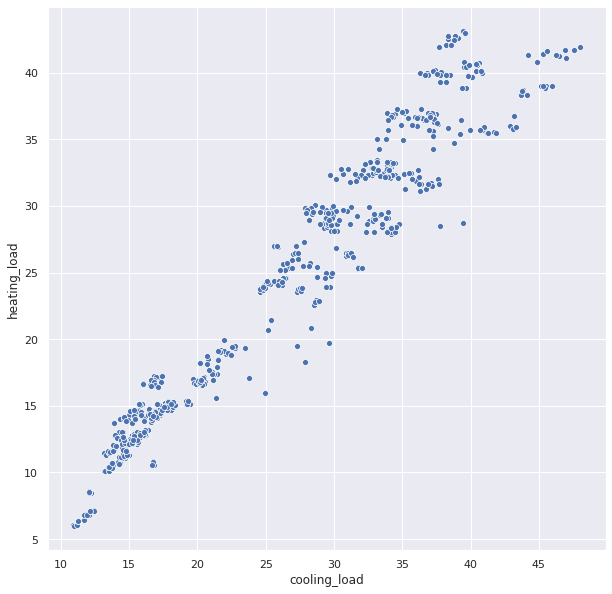

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.set(style='darkgrid')
sns.scatterplot(x=df.cooling_load, y=df.heating_load, data=df)

plt.show()

Na osnovu slike iznad, vidimo da su heating i cooling load u direktnoj vezi. Postoji skoro linearna zavisnost. Drugim recima, povecanje heating vrednosti skoro linearno utice utice na povecanje cooling vrednosti i obrnuto. 

### 3.3 Correlation Heatmap <a name="correlation"/>

Kako bismo dalje potvrdili korelaciju izmedju odredjenih atributa, mozemo iskoristiti korelacionu matricu, gde cemo prikazati sve atribute. Vrednosti se krecu od -1 do 1.

**-1** - sto je vrednost bliza -1, jaca je negativna korelacija\
**0** - vrednosti u okolini nule, znace da je korelacija slabija - ne postoji u nuli\
**1** - sto je vrednost bliza jedinici, jaca je pozitivna korelacija

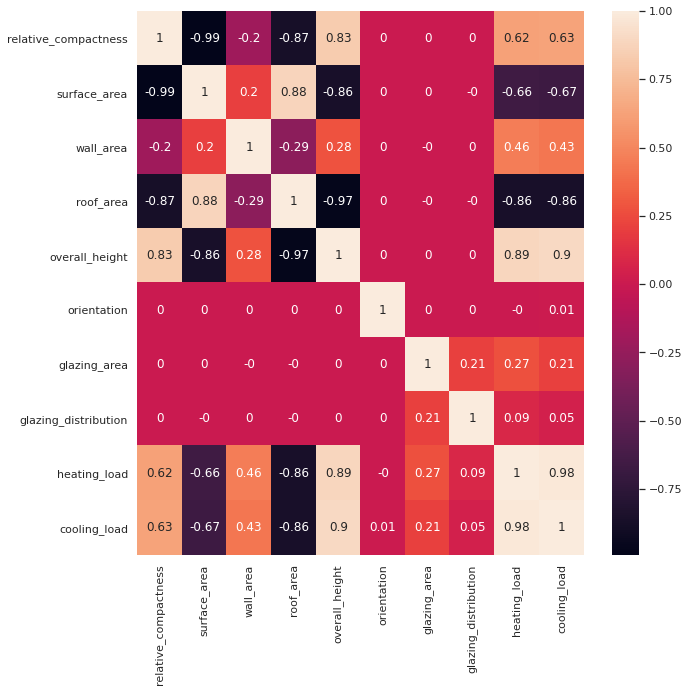

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Na osnovu korelacione matrice mozemo izvesti neke nove zakljucke, ali i potvrditi neka prethodno pomenute pretpostavke:
* vrednosti matrice koje su oko **0**, nemaju uticaj na heating i cooling load. Npr. mozemo videti da **orientation** ima vrednosti - **0/0.01** za heating/cooling load.
* korelacione vrednosti izmedju **glazing_distribution** i heating/cooling load su takodje male - **0.09/0.05**
* **glazing_area** korelaciona vrednost je malo bliza vrednosti **1**, sto znaci da postoji veoma slaba korelacija - **0.27/0.21**
* korelacija izmedju **heating i cooling load** je **0.98**, sto potvrdjuje razmatranja iz prethodnih koraka, da su u snaznoj korelaciji
* **overall_height** ima jaku pozitivnu korelaciju **0.89/0.9** sa obe nase target vrednosti
* **roof_area ima** jaku negativnu korelaciju **-0.86/-0.86** sa obe nase target vrednosti
* **relative_compactness** i **surface_area** imaju slicne vrednosti, ali suprotnog znaka. **0.62/0.63** za relative_compactness, odnosno, **-0.66/-0.67** za surface_area
* **wall_area** ima vrednost **0.46/0.43**, sto je malo slabije u odnosu na relative compactness na primer.

**orientation i glazing_distribution su u vrlo slaboj korelaciji sa output vrednostima.**

## 4. Models <a name="models"/>

### 4.1 Standardization and splitting <a name="standardization"/>

In [16]:
X = df[['relative_compactness', 
        'surface_area', 
        'wall_area', 
        'roof_area', 
        'overall_height', 
        'orientation', 
        'glazing_area', 
        'glazing_distribution']]
y = df[['heating_load']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) # random_state controls the shuffling applied to the data before applying the split

In [17]:
# Sandardization of data
predictorScaler = StandardScaler()
targetVarScaler = StandardScaler()

In [18]:
# Storing the fit object for later reference
predictorScalerFit=predictorScaler.fit(X)
targetVarScalerFit=targetVarScaler.fit(y)

In [19]:
# Generating the standardized values of X and y
X=predictorScalerFit.transform(X)
y=targetVarScalerFit.transform(y)

In [20]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print("Ceo dataset X: {}".format(X.shape))
print("Ceo dataset Y: {}".format(y.shape))
print("X dataset za treniranje X_train: {}".format(X_train.shape))
print("X dataset za testiranje X_test: {}".format(X_test.shape))
print("Y dataset za treniranje Y_train: {}".format(y_train.shape))
print("Y dataset za testiranje Y_test: {}".format(y_test.shape))

Ceo dataset X: (768, 8)
Ceo dataset Y: (768, 1)
X dataset za treniranje X_train: (537, 8)
X dataset za testiranje X_test: (231, 8)
Y dataset za treniranje Y_train: (537, 1)
Y dataset za testiranje Y_test: (231, 1)


### 4.2 Model Zero <a name="model-0"/>

### 4.3 Grid Search <a name="grid"/>

In [40]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    unit_list = [5, 8, 10, 12, 32]
    optimizer_list = ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Nadam']
    activation_list = ['relu', 'tanh', 'sigmoid', 'softmax']
    
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            for unit_trial in unit_list:
                for optimizer_trial in optimizer_list:
                    for activation_trial in activation_list:
                        TrialNumber+=1
                        # create ANN model
                        model = Sequential()
                        # Defining the first layer of the model
                        model.add(Dense(units=unit_trial, input_dim=X_train.shape[1], kernel_initializer='normal', activation=activation_trial))

                        # Defining the Second layer of the model
                        model.add(Dense(units=unit_trial, kernel_initializer='normal', activation=activation_trial))
                        model.add(Dense(units=unit_trial, kernel_initializer='normal', activation=activation_trial))
                        model.add(Dense(units=unit_trial, kernel_initializer='normal', activation=activation_trial))

                        # The output neuron is a single fully connected node 
                        # Since we will be predicting a single number
                        model.add(Dense(1, kernel_initializer='normal'))

                        # Compiling the model
                        model.compile(loss='mean_squared_error', optimizer=optimizer_trial)

                        # Fitting the ANN to the Training set
                        model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

                        MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

                        # printing the results of the current iteration
                        print(TrialNumber, 'Parameters:',
                              'batch_size:', batch_size_trial,';', 
                              'epochs:', epochs_trial,';',
                              'unit:', unit_trial,';',
                              'optimizer:', optimizer_trial,';',
                              'activation:', activation_trial,';',
                              'Accuracy:', 100-MAPE)

                        SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, 
                                                                                       str(batch_size_trial)+';'+
                                                                                       str(epochs_trial)+';'+
                                                                                       str(unit_trial)+';'+
                                                                                       str(optimizer_trial)+';'+
                                                                                       str(activation_trial),
                                                                                       100-MAPE]],
                                                                                columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: SGD ; activation: relu ; Accuracy: 97.48375717371512
2 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: SGD ; activation: tanh ; Accuracy: 90.70062592479874
3 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: SGD ; activation: sigmoid ; Accuracy: 105.13635450197401
4 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: SGD ; activation: softmax ; Accuracy: 97.3662933972673
5 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: RMSprop ; activation: relu ; Accuracy: 95.43853164266388
6 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: RMSprop ; activation: tanh ; Accuracy: 79.38396565249785
7 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: RMSprop ; activation: sigmoid ; Accuracy: 91.60522296219028
8 Parameters: batch_size: 5 ; epochs: 5 ; unit: 5 ; optimizer: RMSprop ; activation: softmax ; Accuracy: 91.90289907590189
9 Parameters: batch_size: 5 ; epochs: 5 ; un

KeyboardInterrupt: 

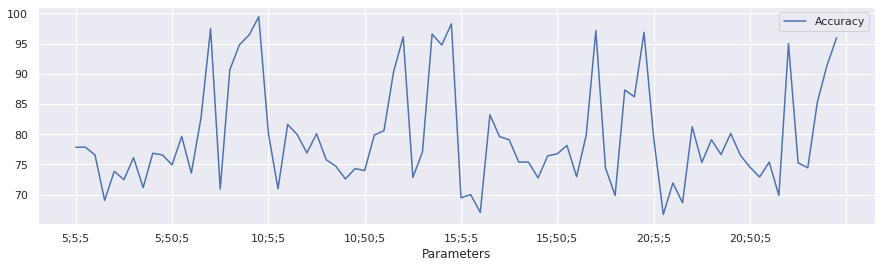

In [36]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Na osnovu ovog grafa vidimo da su najbolji rezultati za **batch_size=5 i epochs=5**. Naredni najbolji rezultat je **batch_size=20 i epochs=5**.

Sada mozemo probati treniranje sa najboljim parametrima iz grafa.

In [37]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=32, input_dim=8, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=32, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=1)

Epoch 1/100
108/108 [==============================] - 1s 5ms/step - loss: 0.4340
Epoch 2/100
108/108 [==============================] - 0s 5ms/step - loss: 0.0935
Epoch 3/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0821
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0775
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0761
Epoch 6/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0730
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0714
Epoch 8/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 10/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0717
Epoch 11/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0661
Epoch 12/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0701
Epoch 13/100


In [38]:
# Fitting the ANN to the Training set
#model.fit(X_train, y_train, batch_size = 5, epochs = 100, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=targetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=targetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=predictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=['relative_compactness', 
        'surface_area', 
        'wall_area', 
        'roof_area', 
        'overall_height', 
        'orientation', 
        'glazing_area', 
        'glazing_distribution'])
TestingData['load']=y_test_orig
TestingData['PredictedLoad']=Predictions
TestingData.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,load,PredictedLoad
0,0.62,808.5,367.5,220.50,3.5,2.0,0.40,3.0,16.47,17.077736
1,0.66,759.5,318.5,220.50,3.5,2.0,0.25,1.0,13.17,13.055633
2,0.98,514.5,294.0,110.25,7.0,2.0,0.40,3.0,32.82,32.678585
3,0.79,637.0,343.0,147.00,7.0,4.0,0.40,4.0,41.32,42.164486
4,0.64,784.0,343.0,220.50,3.5,3.0,0.25,4.0,16.69,16.377518


Accuracy of the model

In [39]:
# Computing the absolute percent error
APE=100*(abs(TestingData['load']-TestingData['PredictedLoad'])/TestingData['load'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 97.31355368140724


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,load,PredictedLoad,APE
0,0.62,808.5,367.5,220.50,3.5,2.0,0.40,3.0,16.47,17.077736,3.689957
1,0.66,759.5,318.5,220.50,3.5,2.0,0.25,1.0,13.17,13.055633,0.868393
2,0.98,514.5,294.0,110.25,7.0,2.0,0.40,3.0,32.82,32.678585,0.430880
3,0.79,637.0,343.0,147.00,7.0,4.0,0.40,4.0,41.32,42.164486,2.043770
4,0.64,784.0,343.0,220.50,3.5,3.0,0.25,4.0,16.69,16.377518,1.872273
